# Frozen Lake RL example
Based on [Thomas Simomini's example](https://github.com/simoninithomas/Deep_reinforcement_learning_Course)

To do:
- Defaultdict instead of qtable
- Q-learning to standalone module

### Step 0: Import dependencies

In [1]:
import numpy as np
import gym
import random

### Step 1: Create the environment

In [4]:
# Create the env
env = gym.make("FrozenLake-v0")
env.render()
"""
SFFF       (S: starting point, safe)
FHFH       (F: frozen surface, safe)
FFFH       (H: hole, fall to your doom)
HFFG       (G: goal, where the frisbee is located)
"""


SFFF
FHFH
FFFH
HFFG


'\nSFFF       (S: starting point, safe)\nFHFH       (F: frozen surface, safe)\nFFFH       (H: hole, fall to your doom)\nHFFG       (G: goal, where the frisbee is located)\n'

### Step 2: Create the Q-table and initialize it

In [9]:
action_size = env.action_space.n
print("Action size: ", action_size)
state_size = env.observation_space.n
print("State size: ", state_size)

Action size:  4
State size:  16


### Step 3: Define the hyperparameters

In [51]:
total_episodes = 150000
learning_rate = 0.8
max_steps = 99
gamma = .95

# Exploration parameters
epsilon = 1.0
max_epsilon = 1.0
min_epsilon = 0.01
decay_rate = 0.005

### Step 4: Q-Learning algorithm
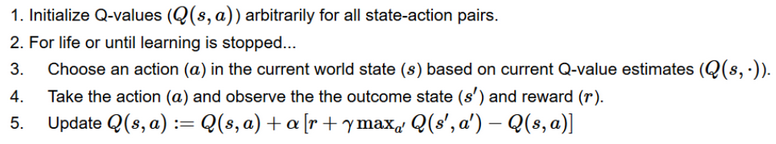

In [52]:
# 1: Initialize Q values
qtable = np.zeros((state_size, action_size))
rewards = []
# 2
for episode in range(total_episodes):
    # Reset the environment
    state = env.reset()
    step = 0
    done = False
    total_rewards = 0
    
    for step in range(max_steps):
        # 3: Pick an action
        if random.random() > epsilon:
            # Exploitation
            action = np.argmax(qtable[state,:])
        else:
            # Exploration
            action = env.action_space.sample()
        
        # 4: Take the action
        new_state, reward, done, info = env.step(action)
        
        # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
        qtable[state, action] += learning_rate * (reward + gamma * np.max(qtable[new_state, :]) - qtable[state, action]) 
        
        total_rewards += reward
        state = new_state
        
        if done:
            break
    
    # Reduce epsilon to explore less
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)
    rewards.append(total_rewards)
    
print("Score over time: " + str(sum(rewards)/total_episodes))
print(qtable)

Score over time: 0.4936933333333333
[[3.73585364e-01 5.76783164e-02 9.45009018e-02 5.17654496e-02]
 [5.41553398e-03 2.59736937e-04 9.23307646e-03 9.48544953e-02]
 [2.03582465e-02 5.90800732e-03 5.06039375e-03 3.99654716e-02]
 [2.27756608e-02 8.64688047e-03 5.50425363e-03 2.19295819e-02]
 [3.98439154e-01 1.77001618e-02 3.65460786e-02 4.26257633e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.92468708e-01 6.72219533e-06 8.09661212e-03 8.67738840e-06]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.98495369e-01 3.09707759e-01 1.11237510e-01 4.97166183e-01]
 [1.20294173e-01 7.65548146e-01 1.15351858e-04 2.18617746e-02]
 [8.42113345e-01 3.69290022e-02 2.76441368e-04 9.85526611e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [8.32597244e-02 3.53169090e-02 5.70320984e-01 4.37139126e-01]
 [2.55777989e-01 9.99079046e-01 2.05781467e-01 2.80850036e-01]
 [0.00000000e+00 0.

### Step 5: Play the game

In [55]:
for episode in range(1):
    state = env.reset()
    step = 0
    done = False
    print('*'*50, "\nEpisode", episode)
    
    for step in range(max_steps):
        action = np.argmax(qtable[state,:])
        new_state, reward, done, info = env.step(action)
        if done:
            env.render()
            print("Number of steps", step)
            break
        state = new_state
env.close()

************************************************** 
Episode 0
  (Down)
SFFF
FHFH
FFFH
HFFG
Number of steps 20
